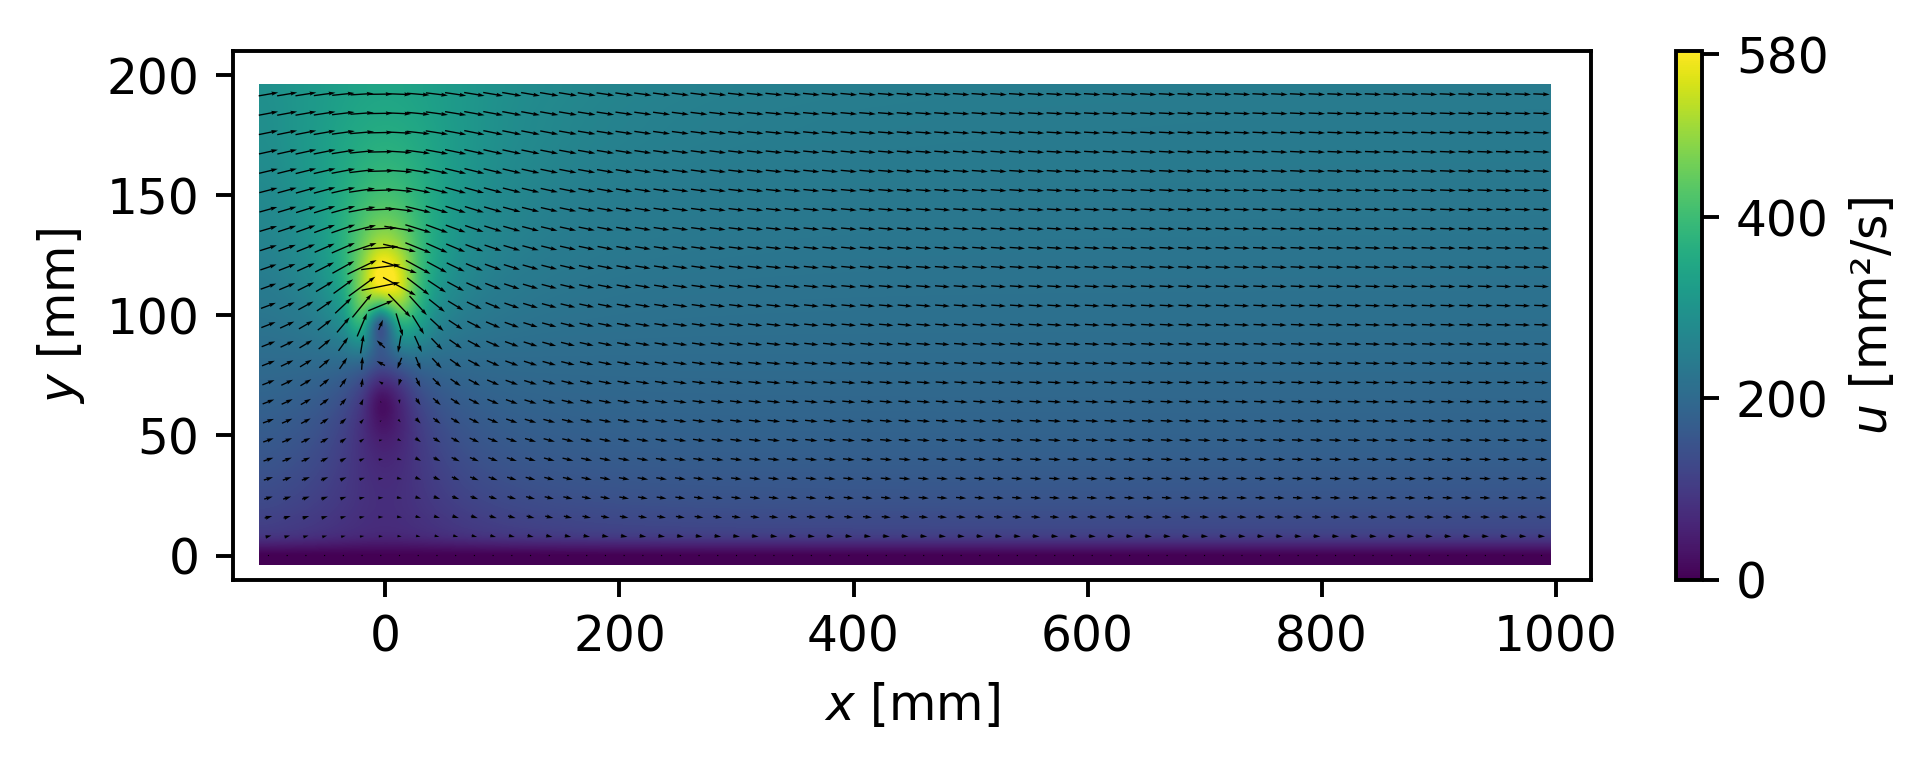

In [1]:
from math import log
from constants import g, ρ_p, ρ,ν
from hjelpefunksjonar import norm
import numpy as np
import matplotlib.pyplot as plt

π = np.pi
c1 = 2 * 50 * π * 200 # sirkulasjon, dvs. ved radius 50 mm skal farten vera 200 mm/s.
J = 0.0001
h = 300.
γ = g * ρ
τ0 = γ * h * J
u_star = (τ0/ρ)**0.5
k_s = 20.
hev = 100.
t= 50

def get_u_log(x):
    # with np.errstate(divide='raise'):
    u_log = np.zeros_like(x)
    u_log[0] = np.clip((2.5*np.log(np.clip(x[1]/k_s,a_min=0.00001,a_max=None)) + 8.5) * u_star,a_min=0.0,a_max=None)
    return u_log

u_log_max = get_u_log(np.asarray([[0], [h]]))[0]

def get_u(t, x_inn):
    #x_inn = x,y,u,v

    t= 50
    number_of_vectors = x_inn.shape[-1] #Dette er talet på vektorar pga vectorized i solve_ivp. Vanlegvis 1, men kan vera fleire, t.d. 4.

    kvervel = kvervelfunksjon(x_inn, c1,t)
    u_log = get_u_log(x_inn[:2])
    U_f =  kvervel * u_log[0]/u_log_max + u_log
   
    return U_f

def kvervelfunksjon(x_inn, c1, t):
    x_kvervel = x_inn[:2] - np.array([[0],[hev]])
    r =np.square(x_kvervel).sum(axis=-2)
    # kvervel = -np.expm1(-r/(4*ν))*c1*np.flip(x_kvervel, axis=-2)*np.array([[1],[-1]])/(r*4*np.pi)
    kvervel = np.divide(-np.expm1(-r/(4*ν*t))*c1*np.flip(x_kvervel, axis=-2)*np.array([[1],[-1]]) ,(r*2*np.pi), out=np.zeros_like(x_kvervel), where=r!=0)
    return kvervel
ty = 8
tx = 2*ty
x, y = np.meshgrid(np.arange(-100,1000,tx), np.arange(0,200,ty))

xy = np.stack((x.ravel(),y.ravel()))
#u = c1*(y-hev)/((2*π)*(x**2+(y-hev)**2)) * (1 - np.exp( -(x**2+(y-hev)**2)/(4* ν *t))) * (2.5*np.log(y/k_s) + 8.5) * u_star/u_log_max + (2.5*np.log(y/k_s) + 8.5) * u_star
#v = c1/(2*π) *(- x) /(x**2+(y-hev)**2) * (1 - np.exp( -(x**2+(y-hev)**2)/(4* ν *t)))

u = get_u(t, xy)
m = np.hypot(u[0],u[1]).reshape(x.shape)
myDPI = 350
fig, ax = plt.subplots(figsize=(2000/myDPI,800/myDPI),dpi=myDPI)
im = ax.imshow(m, origin='lower', extent=(x[0,0]-tx/2,x[0,-1]+tx/2,y[0,0]-ty/2,y[-1,0]+ty/2), interpolation='spline16',aspect='auto', cmap='viridis')
Q = ax.quiver(x, y, u[0], u[1], pivot='mid', width=0.001,scale=20000)#, color='lightgrey')
ax.set_ylim((-10,210))
ax.set_xlim((-130,1030))
clb = fig.colorbar(im, ax=ax, ticks=[0,200,400,580])
ax.set_xlabel(r'$x$ [mm]')
ax.set_ylabel(r'$y$ [mm]')
clb.ax.set_ylabel(r'$u$ [mm²/s]')
# ax.set_aspect('equal','box')
fig.tight_layout()